In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
df_raw.columns = ['review', 'rating']

In [3]:
df_raw.head()

,review,rating
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
keywords = ['good', 'great', 'excellent', 'love', 'happy', 'amazed', 'pleased', 'easy', 'satisfied', 'comfortable', ]

# Note that we add spaces around the key so that we're getting the word, not just pattern matching.
    
for key in keywords:
    
    df_raw[str(key)] = df_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [5]:
df_raw['allcaps'] = df_raw.review.str.isupper()

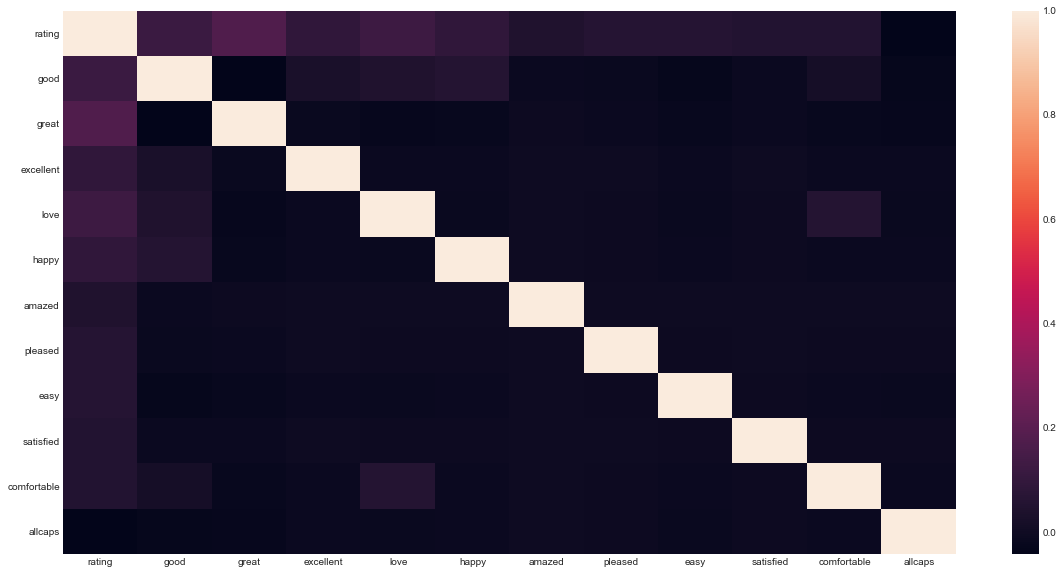

In [6]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set_style('white')
sns.heatmap(df_raw.corr());

In [7]:
data = df_raw[keywords + ['allcaps']]
target = df_raw['rating']

In [8]:
# Bernoulli classifier for binary/boolean data

from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable

bnb = BernoulliNB()

# Fit & classify our model to the data, storing the result in a new variable

y_pred = bnb.fit(data, target).predict(data)

# Display results

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 393


In [9]:
# Gaussian classifier

from sklearn.naive_bayes import GaussianNB

# Instantiate our model and store it in a new variable

gnb = GaussianNB()

# Fit our model to the data

gnb.fit(data, target)

# Classify, storing the result in a new variable

y_pred = gnb.predict(data)

# Display our results

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 414


In [10]:
# Multinomial classifier

from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable

mnb = MultinomialNB()

# Fit our model to the data

mnb.fit(data, target)

# Classify, storing the result in a new variable

y_pred = mnb.predict(data)

# Display our results

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 428


**I found the Bernoulli Naive Bayes model to predict with the most accuracy of the three models.  Adding and updating the keywords yielded a model with increased accuracy, while predicting with less words yielded predictions with noticeably lower accuracy.**